In [1]:
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
dataset=sklearn.datasets.load_boston()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
data=pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [4]:
data['Price']=dataset.target

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
data['TAX'].sort_values()

353    187.0
123    188.0
122    188.0
126    188.0
125    188.0
       ...  
492    711.0
491    711.0
490    711.0
489    711.0
488    711.0
Name: TAX, Length: 506, dtype: float64

In [7]:
data['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [8]:
data.groupby('TAX')['CRIM'].median()

TAX
187.0    0.01709
188.0    0.09849
193.0    0.06738
198.0    0.01501
216.0    0.03705
          ...   
432.0    0.14231
437.0    0.35233
469.0    0.01360
666.0    9.08499
711.0    0.15086
Name: CRIM, Length: 66, dtype: float64

In [9]:
data['B'].sort_values()

450      0.32
423      2.52
410      2.60
457      3.50
424      3.65
        ...  
321    396.90
322    396.90
324    396.90
295    396.90
505    396.90
Name: B, Length: 506, dtype: float64

In [10]:
data.groupby('B')['CRIM'].median().sort_values()

B
394.72     0.01001
394.74     0.01301
395.93     0.01311
394.23     0.01381
392.90     0.01432
            ...   
329.46    41.52920
88.27     45.74610
2.60      51.13580
384.97    67.92080
16.45     73.53410
Name: CRIM, Length: 357, dtype: float64

In [11]:
data.groupby('PTRATIO')['CRIM'].median().sort_values()

PTRATIO
15.3    0.009060
15.5    0.013010
21.1    0.013600
14.4    0.013810
15.1    0.014320
13.6    0.015010
17.0    0.017435
15.6    0.018130
15.9    0.020180
17.3    0.020550
18.2    0.035390
19.0    0.038860
12.6    0.040110
16.1    0.043790
18.8    0.046375
14.9    0.049170
16.9    0.050230
16.8    0.051705
18.3    0.053015
18.5    0.054615
14.8    0.055610
16.4    0.059160
17.6    0.061270
22.0    0.074800
18.7    0.078960
16.0    0.082650
17.8    0.083080
16.6    0.083455
15.2    0.093780
18.0    0.115040
19.7    0.118385
18.9    0.128160
20.9    0.139600
20.1    0.150860
17.9    0.159360
19.1    0.169020
19.2    0.173310
18.6    0.198020
19.6    0.262475
18.4    0.293825
21.2    0.352330
17.4    0.444845
13.0    0.594940
21.0    0.802710
14.7    1.921980
20.2    8.568445
Name: CRIM, dtype: float64

In [12]:
data['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [13]:
data.groupby('AGE')['RAD'].mean().sort_values()

AGE
31.5     1.0
44.4     1.0
49.3     1.0
20.8     1.0
19.1     1.0
        ... 
53.2    24.0
90.7    24.0
96.4    24.0
64.7    24.0
75.0    24.0
Name: RAD, Length: 356, dtype: float64

In [14]:
data['CHAS'].unique()

array([0., 1.])

In [15]:
data['CRIM'].median()

0.25651

In [16]:
data['CRIM'].mean()

3.6135235573122535

In [17]:
data['CRIM'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64>

In [24]:
x=data.drop('Price',axis=1)
y=data['Price']

C:\Users\user\AppData\Local\Temp\ipykernel_7036\1321123858.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=data.drop('Price',"AGE",axis=1)


TypeError: drop() got multiple values for argument 'axis'

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [25]:
model= LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
pre_train=model.predict(x_train)

In [28]:
mean_absolute_error(pre_train,y_train)

3.10315639657944

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
corr=data.corr().round(2)

<AxesSubplot:>

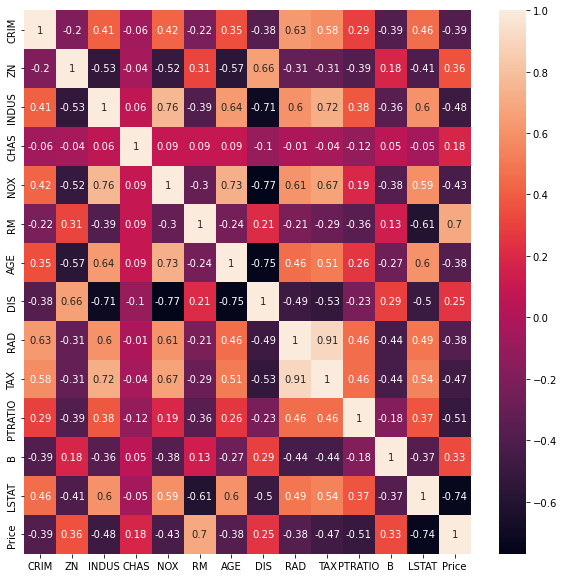

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)### 0.8이상은 빼준다

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
model2=GradientBoostingRegressor()
model2.fit(x_train,y_train)

GradientBoostingRegressor()

In [41]:
pre_train=model2.predict(x_train)

In [53]:
pre_train

array([28.67702326, 20.99384205, 24.56520905, 21.74908643,  9.29750698,
       19.76788889, 20.32309607, 23.95564547, 39.70507689, 14.63289214,
       22.42895526, 19.55944813, 17.13544373, 22.01555965,  8.47569872,
       20.47925141, 10.69037906, 49.24844522, 31.13121457, 11.23120128,
       19.10262427, 21.36962493, 20.65163007, 19.32027927, 33.97773218,
       17.85094514, 20.35791638, 33.55453601, 14.02830125,  9.35948566,
       14.22832395, 19.89535799,  9.20780135, 34.59189043, 22.20147329,
       14.05742132, 26.47923956,  8.16403519, 11.60595557, 21.83846397,
       37.92042933, 24.75817276, 24.73590542, 16.57272012, 33.89014746,
       35.23571433, 10.38727541,  8.49865131, 25.46396504, 27.64293045,
       13.93512681, 24.86022071, 17.32231365, 24.01825193, 19.37623815,
       16.01237171, 19.2462116 , 13.59808006,  8.66202367, 18.29995373,
       35.90199893, 31.68963749, 32.80612519, 21.00405971, 22.50983539,
       24.06077744, 23.89185378, 12.49907347, 28.97200311, 13.75

In [42]:
mean_absolute_error(pre_train,y_train)

0.9772584284948597

In [43]:
pre_test=model2.predict(x_test)

In [44]:
mean_absolute_error(pre_test,y_test)

2.6775741262897275

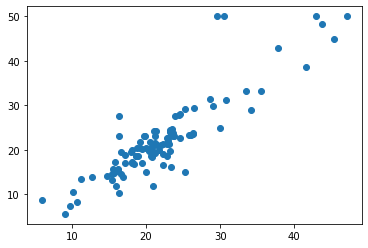

In [48]:
plt.scatter(pre_test,y_test)

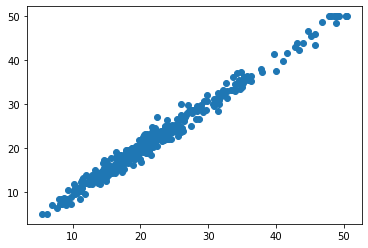

In [49]:
plt.scatter(pre_train,y_train)

In [51]:
real=x_train.iloc[0].values.reshape(1,-1)

In [52]:
model2.predict(real)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([28.67702326])